In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import re

In [2]:
#histogram of number of subwcribers

channels = pd.read_csv("data/df_channels_en.tsv", sep = "\t")
display(channels)


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.0870
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.0870
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.0870
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.0870
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.0870
...,...,...,...,...,...,...,...,...
136465,Music,2016-10-06,UCuM-9AajUOwKw6ipOzu2DRQ,GONE.Fludd - Topic,10128,105,1008139.0,53.1435
136466,People & Blogs,2013-10-17,UCtW9jp5TH0YrgYpwiRf9t-Q,saidthestory,10100,352,1008644.0,53.1435
136467,Gaming,2015-05-08,UCTsxFTIUs8vFDzGccDm6i7Q,Omni H,10000,475,1009505.0,53.1435
136468,Music,2011-04-13,UC1HOArgRCMGPjlcmkThERwA,TĀLĀ,10000,15,1025119.0,53.1435


(array([1.34028e+05, 1.48600e+03, 4.24000e+02, 1.82000e+02, 1.08000e+02,
        6.50000e+01, 4.90000e+01, 2.80000e+01, 2.70000e+01, 2.00000e+01,
        1.00000e+01, 1.20000e+01, 8.00000e+00, 4.00000e+00, 1.00000e+00,
        5.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.00000000e+04, 2.25258926e+06, 4.49517852e+06, 6.73776778e+06,
        8.98035704e+06, 1.12229463e+07, 1.34655356e+07, 1.57081248e+07,
        1.79507141e+07, 2.01933033e+07, 2.24358926e+07, 2.46784819e+07,
        2.69210711e+07, 2.91636604e+07, 3.14062496e+

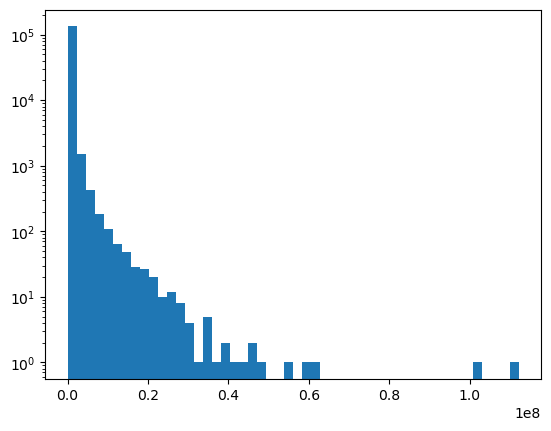

In [3]:
plt.hist(channels['subscribers_cc'], log=True, bins= 50)

In [34]:
import string

def is_collab(text):
    keywords = ["collab", "collaboration", "ft.", "feat", "featuring"]
    # Split the text into words and handle punctuation
    text = text.lower()
    words_in_text = text.translate(str.maketrans('', '', string.punctuation)).split()
    
    
    for word in keywords:
        if word in words_in_text:
            return True
    return False

In [8]:
import numpy as np
!pip install pyspark

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from pyspark import SparkContext
sc = SparkContext()

file_path = "data/yt_metadata_en.jsonl"
raw_data = sc.textFile(file_path)

dataset = raw_data.map(lambda x: json.loads(x))
#dataset.persist()



23/11/10 18:01:56 WARN Utils: Your hostname, agatha-IdeaPad-Slim-5-14IRL8 resolves to a loopback address: 127.0.1.1; using 192.168.1.29 instead (on interface wlp0s20f3)
23/11/10 18:01:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/10 18:01:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [10]:
total_count = dataset.count()

In [11]:
dataset.take(1)

[{'categories': 'Film & Animation',
  'channel_id': 'UCzWrhkg9eK5I8Bm3HfV-unA',
  'crawl_date': '2019-10-31 20:19:26.270363',
  'description': 'Lego City Police Lego Firetruck Cartoons about Lego City Movie for kids with a nice long video to keep the kids entertained while learning and having fun with the Lego City characters from Lego City undercover. Thanks for watching!',
  'dislike_count': 1.0,
  'display_id': 'SBqSc91Hn9g',
  'duration': 1159,
  'like_count': 8.0,
  'tags': 'lego city,lego police,lego city police,lego city episodes,videos de lego city,lego policia,lego bomberos,lego fire truck,lego firetruck,lego police chase,lego robbers,lego cartoons,lego movies,lego videos for kids',
  'title': 'Lego City Police Lego Firetruck Cartoons about Lego City Movie for kids Episodes',
  'upload_date': '2016-09-28 00:00:00',
  'view_count': 1057.0}]

TESTING

In [39]:
filtered_dataset_descr = dataset.filter(lambda x:is_collab(x.get("description", "")))
filtered_dataset_title = dataset.filter(lambda x:is_collab(x.get("title", "")))

In [40]:
colab_count_descr = filtered_dataset_descr.count()
colab_count_title = filtered_dataset_title.count()

In [41]:
print(colab_count_descr/total_count * 100)
print(colab_count_title/total_count * 100)

2.083314763974513
0.5777568600330911


In [42]:
filtered_dataset_descr.take(2)

[{'categories': 'Film & Animation',
  'channel_id': 'UCzWrhkg9eK5I8Bm3HfV-unA',
  'crawl_date': '2019-10-31 20:19:32.717921',
  'description': "The Amazing Spider-Man 2 is a 2014 action-adventure video game that will coincide with the release of the film of the same name featuring the Marvel Comics superhero Spider-Man. It is being developed by Beenox, developer of the previous games Spider-Man: Shattered Dimensions, Spider-Man: Edge of Time and The Amazing Spider-Man, and published by Activision.\n\nThe game takes place alongside the events of the film, as Spider-Man searches for Uncle Ben's killer. The game will feature an all-star villain cast from Spider-Man's universe, and will feature both new and old characters. The game will feature prominent villains such as Kraven the Hunter, Electro, Kingpin, Black Cat, Green Goblin, Chameleon, Carnage, and Shocker.\nEnjoy this Spiderman The Amazing Spider-Man 2 cut scenes movie from the game part 1",
  'dislike_count': 0.0,
  'display_id': 

In [44]:
filtered_dataset_title.take(2)

[{'categories': 'Gaming',
  'channel_id': 'UCzWfqsjlvzAOUozsGFR3kbg',
  'crawl_date': '2019-10-31 15:41:37.422090',
  'description': "CHECKOUT LENA'S CHANNEL! https://www.youtube.com/user/TheDangerousThing\nhttp://www.youtube.com/watch?v=1LFsNiwpLpM\n\nMusic background: Monstercat\n[Electronic] - Laszlo - Law Of The Jungle [Monstercat EP Release]\nhttp://www.youtube.com/watch?v=zMHvZXirECc\n\nhttp://www.youtube.com/watch?v=zMHvZXirECc\n\nFREE DIAMONDS AND GEMS HERE!\nStep by Step Guide:\n1. Go to http://m.freemyapps.com/share/url/BootrampGames\n2. Install the profile\n3. Download the free apps, run them for 30 seconds, go back to FreeMyApps and get points!\n4. Redeem the points for ITunes giftcards and have fun with your gems!\nHope this helps you guys get some Diamonds.\n\n\n\n\nIntro song: [Hard Dance] - Stonebank - The Pressure [Monstercat Release] link: http://youtu.be/45eSOGguEew\n\n\n\n\nIntro made by OwlArtz link: http://youtu.be/8yFwj82g8jw.\n\nFOLLOW ME ON TWITTER : BootrampGa

In [47]:
sampled_dataset = dataset.sample(fraction = 0.001, withReplacement=False ,seed=42)

json_data = sampled_dataset.collect()

with open("data/sampled_dataset.json", "w") as f:
    json.dump(json_data, f)